# Project 4 - Analyze Client Behavior and Determine Prepaid Plans bring Revenue.

## Introduction

Megaline is a company that offers its clients two prepaid plans, Surf and Ultimate. The advertising department wants to know which prepaid plan generates more revenue to adjust the advertising budget.

An initial analysis will be carried out for these prepaid packages based on a relatively small sample of clients. 500 Megaline client data: who they are, where they are from, what type of plan they use, and the number of calls and messages they sent in 2018. The goal is to analyze client behavior and determine which prepaid plan brings more revenue

Megaline rounds from seconds to minutes, as well as megabytes to gigabytes. For calls, each individual call is rounded up: even if a call lasts only one second, it will count as one minute. For web traffic, each individual web session is not rounded up. However, totals for a month are rounded up. If a user spends 1025 megabytes this month, then he will be charged for 2 gigabytes.

### Steps of the Project

1. Initialization
2. Data Preparation
3. Data Pre-Processing
4. Statistical Data Analysis
5. Hypothesis Testing
6. General Conclusion

**Data Description**

Users table (user data):
- `user_id` — User ID
- `first_name` — user's first name
- `last_name` — user's last name
- `age` — user's age (years)
- `reg_date` — subscription start date (dd, mm, yy)
- `churn_date` — the date the user stopped using the service (if the value is missing or does not exist, it means the service plan was in use when this data was generated)
- `city` — the city where the user lives
- `plan` — phone plan name

Calls table (call data):
- `id` — Unique web session ID
- `call_date` — call date
- `duration` — call duration (in minutes)
- `user_id` — ID of the user making the call

Messages table (SMS data):
- `id` — Unique SMS ID
- `message_date` — date the SMS was sent
- `user_id` — ID of the user who sent the SMS

Internet tables (web session data):
- `id` — Unique web session ID
- `mb_used` — volume of data consumed during the session (in megabytes)
- `session_date` — web session date
- `user_id` — User ID

Plans table (phone package data):
- `plan_name` — phone plan name
- `usd_monthly_fee` — monthly fee in US dollars
- `minutes_included` — monthly calling minutes allocation
- `messages_included` — monthly SMS allocation
- `mb_per_month_included` — monthly data volume allocation (in megabytes)
- `usd_per_minute` — price per minute if the package allocation limit has been exceeded (for example, if the package has an allocation of 100 minutes, then usage starting from the 101st minute will be charged)
- `usd_per_message` — price per SMS if the package allocation limit has been exceeded
- `usd_per_gb` — price per extra gigabyte of data if the package allocation limit is exceeded (1 GB = 1024 megabytes)

## Initialization

In [1]:
# import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings

warnings.filterwarnings('ignore')

In [2]:
df_calls = pd.read_csv('megaline_calls.csv')
df_internet = pd.read_csv('megaline_internet.csv')
df_messages = pd.read_csv('megaline_messages.csv')
df_plans = pd.read_csv('megaline_plans.csv')
df_users = pd.read_csv('megaline_users.csv')

## Data Preparation

***calls***

In [3]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [4]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [5]:
df_calls.dtypes

id            object
user_id        int64
call_date     object
duration     float64
dtype: object

In [6]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


***internet***

In [7]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [8]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [9]:
df_internet.dtypes

id               object
user_id           int64
session_date     object
mb_used         float64
dtype: object

In [10]:
df_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


***messages***

In [11]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [12]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
df_messages.dtypes

id              object
user_id          int64
message_date    object
dtype: object

In [14]:
df_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


***plans***

In [15]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [16]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [17]:
df_plans.dtypes

messages_included          int64
mb_per_month_included      int64
minutes_included           int64
usd_monthly_pay            int64
usd_per_gb                 int64
usd_per_message          float64
usd_per_minute           float64
plan_name                 object
dtype: object

In [18]:
df_plans.describe()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


***users***

In [19]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [20]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [21]:
df_users.dtypes

user_id        int64
first_name    object
last_name     object
age            int64
city          object
reg_date      object
plan          object
churn_date    object
dtype: object

In [22]:
df_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


**Findings :**

- For the "calls" file there are no empty values, but there is a data type that is different from what it should be, such as the 'call_date' column which should be in the form of a datetime data type
- For the "internet" file there are no empty values, but there is a data type that is different from what it should be, such as the 'call_date' column which should be in the form of a datetime data type
- For the "messages" file there are no empty values, but there is a data type that is different from what it should be, such as the 'call_date' column which should be in the form of a datetime data type
- For the "users" file there is an empty value in the 'churn_date' column, but this will not be a problem because there is no data for the unsubscription date, for the data types in the 'reg_date' and 'churn_date' columns it is also wrong, but will not be replaced because will be removed later

## Data Pre-Processing

### Grouping Specific Column for each Dataset

***calls***

In [23]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])

In [24]:
df_calls['duration_up'] = df_calls['duration'].apply(np.ceil).astype('int')

In [25]:
df_calls['month'] = df_calls['call_date'].dt.month.astype('str')
df_calls['year'] = df_calls['call_date'].dt.year.astype('str')
df_calls['year_month'] = df_calls['year'] + '-' + df_calls['month']

In [26]:
df_calls

,id,user_id,call_date,duration,duration_up,month,year,year_month
0,1000_93,1000,2018-12-27,8.52,9,12,2018,2018-12
1,1000_145,1000,2018-12-27,13.66,14,12,2018,2018-12
2,1000_247,1000,2018-12-27,14.48,15,12,2018,2018-12
3,1000_309,1000,2018-12-28,5.76,6,12,2018,2018-12
4,1000_380,1000,2018-12-30,4.22,5,12,2018,2018-12
...,...,...,...,...,...,...,...,...
137730,1499_199,1499,2018-11-21,8.72,9,11,2018,2018-11
137731,1499_200,1499,2018-10-20,10.89,11,10,2018,2018-10
137732,1499_201,1499,2018-09-21,8.12,9,9,2018,2018-9
137733,1499_202,1499,2018-10-10,0.37,1,10,2018,2018-10


To make it easier to analyze data and calculate revenue, several columns will be grouped

In [27]:
df_calls_agg = df_calls.groupby(['user_id', 'year_month']).agg({
    'duration_up' : 'sum'
}).reset_index()

In [28]:
df_calls_agg

,user_id,year_month,duration_up
0,1000,2018-12,124
1,1001,2018-10,393
2,1001,2018-11,426
3,1001,2018-12,412
4,1001,2018-8,182
...,...,...,...
2253,1498,2018-9,363
2254,1499,2018-10,385
2255,1499,2018-11,308
2256,1499,2018-12,496


The data that has been grouped will later be used to merge with other data to simplify the analysis process and calculate revenue

***internet***

In [29]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])

In [30]:
df_internet['month'] = df_internet['session_date'].dt.month.astype('str')
df_internet['year'] = df_internet['session_date'].dt.year.astype('str')
df_internet['year_month'] = df_internet['year'] + '-' + df_internet['month']

In [31]:
df_internet

,id,user_id,session_date,mb_used,month,year,year_month
0,1000_13,1000,2018-12-29,89.86,12,2018,2018-12
1,1000_204,1000,2018-12-31,0.00,12,2018,2018-12
2,1000_379,1000,2018-12-28,660.40,12,2018,2018-12
3,1000_413,1000,2018-12-26,270.99,12,2018,2018-12
4,1000_442,1000,2018-12-27,880.22,12,2018,2018-12
...,...,...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10,2018,2018-10
104821,1499_216,1499,2018-12-30,304.72,12,2018,2018-12
104822,1499_217,1499,2018-09-22,292.75,9,2018,2018-9
104823,1499_218,1499,2018-12-07,0.00,12,2018,2018-12


To make it easier to analyze data and calculate revenue, several columns will be grouped

In [32]:
df_internet_agg = df_internet.groupby(['user_id', 'year_month']).agg({
    'mb_used' : 'sum'
}).reset_index()

In [33]:
df_internet_agg

,user_id,year_month,mb_used
0,1000,2018-12,1901.47
1,1001,2018-10,22330.49
2,1001,2018-11,18504.30
3,1001,2018-12,19369.18
4,1001,2018-8,6919.15
...,...,...,...
2272,1498,2018-9,22827.28
2273,1499,2018-10,19492.43
2274,1499,2018-11,16813.83
2275,1499,2018-12,22059.21


For internet files, in the 'mb_used' column an additional 'gb_used' column will be added because the size used as the price benchmark is gb

In [34]:
df_internet_agg['gb_used'] = df_internet_agg['mb_used'] / 1024

In [35]:
df_internet_agg['gb_used_up'] = df_internet_agg['gb_used'].apply(np.ceil).astype('int')

In [36]:
df_internet_agg

,user_id,year_month,mb_used,gb_used,gb_used_up
0,1000,2018-12,1901.47,1.856904,2
1,1001,2018-10,22330.49,21.807119,22
2,1001,2018-11,18504.30,18.070605,19
3,1001,2018-12,19369.18,18.915215,19
4,1001,2018-8,6919.15,6.756982,7
...,...,...,...,...,...
2272,1498,2018-9,22827.28,22.292266,23
2273,1499,2018-10,19492.43,19.035576,20
2274,1499,2018-11,16813.83,16.419756,17
2275,1499,2018-12,22059.21,21.542197,22


The data that has been grouped will later be used to merge with other data to simplify the analysis process and calculate revenue

***messages***

In [37]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])

In [38]:
df_messages['month'] = df_messages['message_date'].dt.month.astype('str')
df_messages['year'] = df_messages['message_date'].dt.year.astype('str')
df_messages['year_month'] = df_messages['year'] + '-' + df_messages['month']

In [39]:
df_messages

,id,user_id,message_date,month,year,year_month
0,1000_125,1000,2018-12-27,12,2018,2018-12
1,1000_160,1000,2018-12-31,12,2018,2018-12
2,1000_223,1000,2018-12-31,12,2018,2018-12
3,1000_251,1000,2018-12-27,12,2018,2018-12
4,1000_255,1000,2018-12-26,12,2018,2018-12
...,...,...,...,...,...,...
76046,1497_526,1497,2018-12-24,12,2018,2018-12
76047,1497_536,1497,2018-12-24,12,2018,2018-12
76048,1497_547,1497,2018-12-31,12,2018,2018-12
76049,1497_558,1497,2018-12-24,12,2018,2018-12


To make it easier to analyze data and calculate revenue, several columns will be grouped

In [40]:
df_messages_agg = df_internet.groupby(['user_id', 'year_month']).agg({
    'id' : 'count'
}).reset_index().rename(columns={
    'id' : 'message_count'
})

In [41]:
df_messages_agg

,user_id,year_month,message_count
0,1000,2018-12,5
1,1001,2018-10,56
2,1001,2018-11,51
3,1001,2018-12,60
4,1001,2018-8,25
...,...,...,...
2272,1498,2018-9,57
2273,1499,2018-10,61
2274,1499,2018-11,49
2275,1499,2018-12,65


The data that has been grouped will later be used to merge with other data to simplify the analysis process and calculate revenue

### Dataset Merger

Merge the "calls" and "internet" data with the benchmarks in the 'user_id" and 'year_month' columns while retaining the empty values

In [42]:
df_merge2 = pd.merge(df_calls_agg, df_internet_agg, on=['user_id', 'year_month'], how='outer')

Merge the "calls" and "internet" data which were previously combined with the "messages" data with the benchmarks in the 'user_id" and 'year_month' columns while maintaining the empty values

In [43]:
df_merge3 = pd.merge(df_merge2, df_messages_agg, on=['user_id', 'year_month'], how='outer')

In [44]:
df_merge3.isnull().sum()

user_id           0
year_month        0
duration_up      34
mb_used          15
gb_used          15
gb_used_up       15
message_count    15
dtype: int64

Empty values in merged data will not be removed, but will be replaced with the number 0, due to the possibility that customers will not use the facility.

In [45]:
df_merge3.head()

,user_id,year_month,duration_up,mb_used,gb_used,gb_used_up,message_count
0,1000,2018-12,124.0,1901.47,1.856904,2.0,5.0
1,1001,2018-10,393.0,22330.49,21.807119,22.0,56.0
2,1001,2018-11,426.0,18504.30,18.070605,19.0,51.0
3,1001,2018-12,412.0,19369.18,18.915215,19.0,60.0
4,1001,2018-8,182.0,6919.15,6.756982,7.0,25.0


In [46]:
df_merge3 = df_merge3.fillna(0).drop(columns=['mb_used', 'gb_used'])

In [47]:
df_merge3.head()

,user_id,year_month,duration_up,gb_used_up,message_count
0,1000,2018-12,124.0,2.0,5.0
1,1001,2018-10,393.0,22.0,56.0
2,1001,2018-11,426.0,19.0,51.0
3,1001,2018-12,412.0,19.0,60.0
4,1001,2018-8,182.0,7.0,25.0


Data that has been merged and tidied will be merged again with "plan" and "user" data.

***check plan, user***

In [48]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [49]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Merge the "plan" and "user" data with the reference in the 'plan' column while maintaining the empty value

In [50]:
df_user_plan = pd.merge(df_users, df_plans, left_on='plan', right_on='plan_name')

In [51]:
df_user_plan.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1011,Halina,Henry,73,"Cleveland-Elyria, OH MSA",2018-01-18,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1013,Nicolas,Snider,50,"Knoxville, TN MSA",2018-12-01,ultimate,NaN,1000,30720,3000,70,7,0.01,0.01,ultimate


In [52]:
df_user_plan['gb_per_month_included'] = df_user_plan['mb_per_month_included'] / 1024

In [53]:
df_user_plan = df_user_plan.drop(columns=['first_name', 'last_name', 'age', 'reg_date', 'churn_date', 'mb_per_month_included', 'plan_name'])

In [54]:
df_user_plan.head()

,user_id,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,30.0
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,3000,70,7,0.01,0.01,30.0
2,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,3000,70,7,0.01,0.01,30.0
3,1011,"Cleveland-Elyria, OH MSA",ultimate,1000,3000,70,7,0.01,0.01,30.0
4,1013,"Knoxville, TN MSA",ultimate,1000,3000,70,7,0.01,0.01,30.0


After merging the "user" and "plan" data, the combined results will be combined with the data (df_merge3) which is a combination of the 3 data above

In [55]:
df_all_merge = pd.merge(df_merge3, df_user_plan, on=['user_id'], how='inner')

In [56]:
df_all_merge.shape, df_merge3.shape

((2292, 14), (2292, 5))

In [57]:
df_all_merge.isnull().sum()

user_id                  0
year_month               0
duration_up              0
gb_used_up               0
message_count            0
city                     0
plan                     0
messages_included        0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
gb_per_month_included    0
dtype: int64

In [58]:
df_all_merge.head()

,user_id,year_month,duration_up,gb_used_up,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included
0,1000,2018-12,124.0,2.0,5.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,30.0
1,1001,2018-10,393.0,22.0,56.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0
2,1001,2018-11,426.0,19.0,51.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0
3,1001,2018-12,412.0,19.0,60.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0
4,1001,2018-8,182.0,7.0,25.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0


***revenue***

This time, a calculation will be made of the costs that consumers must pay when using a cellular data package that exceeds the facilities provided

In [59]:
def charge_calls(row):
    plan = row['plan']
    minutes_used = row['duration_up']
    
    if plan == 'surf':
        if minutes_used > 500:
            chargeable = (minutes_used - 500) * 0.03
        else:
            chargeable = 0
    if plan == 'ultimate':
        if minutes_used > 3000:
            chargeable = (minutes_used - 3000) * 0.01
        else:
            chargeable = 0
    return chargeable

In [60]:
def charge_messages(row):
    plan = row['plan']
    number_of_texts = row['message_count']
    
    if plan == 'surf':
        if number_of_texts > 50:
            chargeable = (number_of_texts - 50) * 0.03
        else:
            chargeable = 0
    if plan == 'ultimate':
        if number_of_texts > 1000:
            chargeable = (number_of_texts - 1000) * 0.01
        else:
            chargeable = 0
    return chargeable

In [61]:
def charge_data(row):
    plan = row['plan']
    data_rounded_up = row['gb_used_up']
    
    if plan == 'surf':
        if data_rounded_up > 15:
            chargeable = (data_rounded_up - 15) * 10
        else:
            chargeable = 0
    if plan == 'ultimate':
        if data_rounded_up > 30:
            chargeable = (data_rounded_up - 30) * 7
        else:
            chargeable = 0
    return chargeable

In [62]:
df_all_merge['call_charge'] = df_all_merge.apply(charge_calls, axis=1)
df_all_merge['message_charge'] = df_all_merge.apply(charge_messages, axis=1)
df_all_merge['internet_charge'] = df_all_merge.apply(charge_data, axis=1)

In [63]:
df_all_merge['revenue'] = df_all_merge['call_charge'] + df_all_merge['message_charge'] + \
                           df_all_merge['internet_charge'] + df_all_merge['usd_monthly_pay']

In [64]:
df_all_merge.head(10).sort_values(by='revenue', ascending=False)

,user_id,year_month,duration_up,gb_used_up,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,call_charge,message_charge,internet_charge,revenue
9,1003,2018-12,1104.0,27.0,52.0,"Tulsa, OK MSA",surf,50,500,20,10,0.03,0.03,15.0,18.12,0.06,120.0,158.18
1,1001,2018-10,393.0,22.0,56.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0,0.00,0.18,70.0,90.18
0,1000,2018-12,124.0,2.0,5.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,30.0,0.00,0.00,0.0,70.00
3,1001,2018-12,412.0,19.0,60.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0,0.00,0.30,40.0,60.30
7,1002,2018-11,386.0,19.0,52.0,"Las Vegas-Henderson-Paradise, NV MSA",surf,50,500,20,10,0.03,0.03,15.0,0.00,0.06,40.0,60.06
2,1001,2018-11,426.0,19.0,51.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0,0.00,0.03,40.0,60.03
5,1001,2018-9,315.0,14.0,53.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0,0.00,0.09,0.0,20.09
8,1002,2018-12,384.0,15.0,51.0,"Las Vegas-Henderson-Paradise, NV MSA",surf,50,500,20,10,0.03,0.03,15.0,0.00,0.03,0.0,20.03
4,1001,2018-8,182.0,7.0,25.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0,0.00,0.00,0.0,20.00
6,1002,2018-10,59.0,7.0,21.0,"Las Vegas-Henderson-Paradise, NV MSA",surf,50,500,20,10,0.03,0.03,15.0,0.00,0.00,0.0,20.00


## Statistical Data Analysis

Data was separated into 'surf' and 'ultimate' packages to see differences in consumer usage of their cellular data

In [65]:
df_all_merge_surf = df_all_merge[df_all_merge['plan']=='surf'].reset_index(drop=True)
df_all_merge_ultimate = df_all_merge[df_all_merge['plan']=='ultimate'].reset_index(drop=True)

In [66]:
df_all_merge_surf.shape, df_all_merge_ultimate.shape

((1573, 18), (719, 18))

### Surf Package

***internet***

<AxesSubplot:xlabel='gb_used_up', ylabel='Density'>

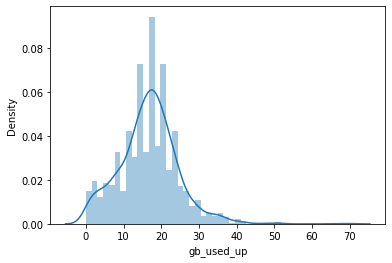

In [67]:
sns.distplot(df_all_merge_surf['gb_used_up'])

In [68]:
df_all_merge_surf['gb_used_up'].describe()

count    1573.000000
mean       16.670693
std         7.847522
min         0.000000
25%        12.000000
50%        17.000000
75%        21.000000
max        70.000000
Name: gb_used_up, dtype: float64

In [69]:
np.var(df_all_merge_surf['gb_used_up'])

61.54444942447023

**Findings :**

- Average usage exceeds the facilities obtained
- Even though the amount of data that uses the internet is not much, the nominal value is very much compared to what is obtained

***calls***|

<AxesSubplot:xlabel='duration_up', ylabel='Density'>

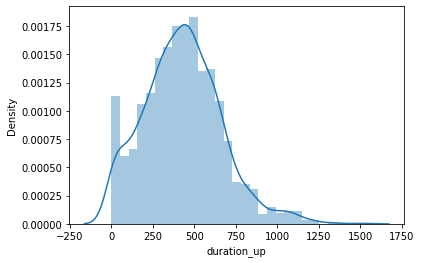

In [70]:
sns.distplot(df_all_merge_surf['duration_up'])

In [71]:
df_all_merge_surf['duration_up'].describe()

count    1573.000000
mean      428.749523
std       234.453150
min         0.000000
25%       272.000000
50%       425.000000
75%       576.000000
max      1510.000000
Name: duration_up, dtype: float64

In [72]:
np.var(df_all_merge_surf['duration_up'])

54933.334591317485

**Findings :**

- Average telephone usage is less than the facilities obtained
- There are also many consumers who use too much of the facilities they get

***message***

<AxesSubplot:xlabel='message_count', ylabel='Density'>

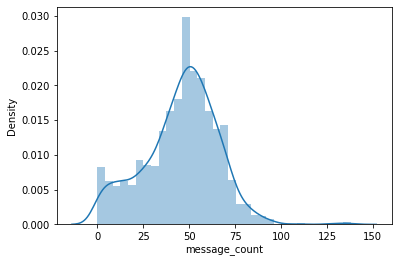

In [73]:
sns.distplot(df_all_merge_surf['message_count'])

In [74]:
df_all_merge_surf['message_count'].describe()

count    1573.000000
mean       45.509218
std        20.130634
min         0.000000
25%        34.000000
50%        48.000000
75%        59.000000
max       138.000000
Name: message_count, dtype: float64

In [75]:
np.var(df_all_merge_surf['message_count'])

404.98481648964236

**Findings :**

- Average usage is less than the facilities obtained
- The use of excessive messages from the facility is not too much

### Ultimate Package

***Internet***

<AxesSubplot:xlabel='gb_used_up', ylabel='Density'>

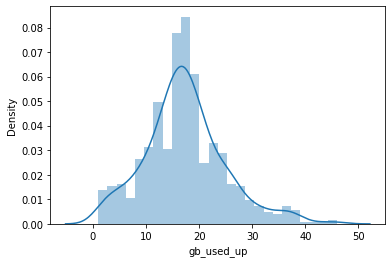

In [76]:
sns.distplot(df_all_merge_ultimate['gb_used_up'])

In [77]:
df_all_merge_ultimate['gb_used_up'].describe()

count    719.000000
mean      17.331015
std        7.648185
min        1.000000
25%       13.000000
50%       17.000000
75%       21.000000
max       46.000000
Name: gb_used_up, dtype: float64

In [78]:
np.var(df_all_merge_ultimate['gb_used_up'])

58.413377411448835

**Findings :**

- average usage is less than the facilities obtained
- consumers with excessive use are only a few and not far from the facilities available

***Calls***

<AxesSubplot:xlabel='duration_up', ylabel='Density'>

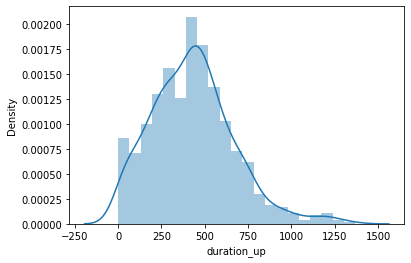

In [79]:
sns.distplot(df_all_merge_ultimate['duration_up'])

In [80]:
df_all_merge_ultimate['duration_up'].describe()

count     719.000000
mean      431.048679
std       240.138729
min         0.000000
25%       260.000000
50%       424.000000
75%       565.500000
max      1369.000000
Name: duration_up, dtype: float64

In [81]:
np.var(df_all_merge_ultimate['duration_up'])

57586.40514081333

**Findings :**

- Average usage is less than the facilities obtained
- No consumer exceeds the facilities obtained

***Message***

<AxesSubplot:xlabel='message_count', ylabel='Density'>

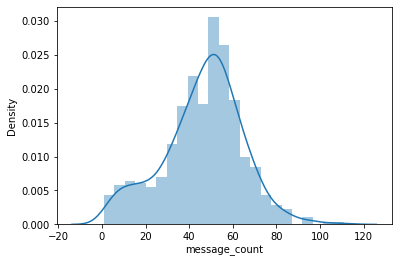

In [82]:
sns.distplot(df_all_merge_ultimate['message_count'])

In [83]:
df_all_merge_ultimate['message_count'].describe()

count    719.000000
mean      46.229485
std       18.281120
min        1.000000
25%       36.000000
50%       49.000000
75%       58.000000
max      111.000000
Name: message_count, dtype: float64

In [84]:
np.var(df_all_merge_ultimate['message_count'])

333.7345409034724

**Findings :**

- Average usage is less than the facilities obtained
- No consumer exceeds the facilities obtained

## Hypothesis Testing

### 1 The average income of Ultimate and Surf phone plan users is different.

- Ho = Average income of Ultimate and Surf phone package users is the same
- H1 = Average income of Ultimate and Surf phone package users is not the same

In [85]:
np.var(df_all_merge_surf['gb_used_up']), np.var(df_all_merge_ultimate['gb_used_up'])

(61.54444942447023, 58.413377411448835)

In [86]:
(np.var(df_all_merge_surf['gb_used_up']) - np.var(df_all_merge_ultimate['gb_used_up'])) / np.var(df_all_merge_surf['gb_used_up']) * 100

5.087496991688861

In [87]:
alpha = 0.05

results = st.ttest_ind(df_all_merge_surf['gb_used_up'], df_all_merge_ultimate['gb_used_up'], equal_var=True)
print('p value : ', results.pvalue)

if results.pvalue < alpha:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')


p value :  0.05968797814489842
Accept null hypothesis


### 2 The average income of users in the NY-NJ area is different from the income of users from the region

- Ho = The average income of users in the NY-NJ area is the same as the income of users from other areas
- H1 = The average income of users in the NY-NJ area is not the same as the income of users from other areas

In [88]:
df_all_merge['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          376
Los Angeles-Long Beach-Anaheim, CA MSA             132
Chicago-Naperville-Elgin, IL-IN-WI MSA              94
Dallas-Fort Worth-Arlington, TX MSA                 88
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA     82
                                                  ... 
Omaha-Council Bluffs, NE-IA MSA                      3
Raleigh-Cary, NC MSA                                 2
El Paso, TX MSA                                      2
Jacksonville, FL MSA                                 2
Cape Coral-Fort Myers, FL MSA                        1
Name: city, Length: 73, dtype: int64

In [89]:
df_all_merge['new_city'] = df_all_merge['city'].str.split(', ').str[1]
df_all_merge['new_city'] = df_all_merge['new_city'].str.replace(' MSA', '')

In [90]:
df_all_merge_NYNJ = df_all_merge[df_all_merge['new_city']=='NY-NJ-PA'].reset_index(drop=True)
df_all_merge_non_NYNJ = df_all_merge[df_all_merge['new_city']!='NY-NJ-PA'].reset_index(drop=True)

In [91]:
df_all_merge_NYNJ.head()

,user_id,year_month,duration_up,gb_used_up,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,call_charge,message_charge,internet_charge,revenue,new_city
0,1014,2018-11,163.0,2.0,1.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,15.0,0.00,0.00,0.0,20.00,NY-NJ-PA
1,1014,2018-12,1114.0,8.0,19.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,15.0,18.42,0.00,0.0,38.42,NY-NJ-PA
2,1022,2018-10,574.0,19.0,62.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,15.0,2.22,0.36,40.0,62.58,NY-NJ-PA
3,1022,2018-11,498.0,22.0,70.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,15.0,0.00,0.60,70.0,90.60,NY-NJ-PA
4,1022,2018-12,585.0,18.0,72.0,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,500,20,10,0.03,0.03,15.0,2.55,0.66,30.0,53.21,NY-NJ-PA


In [92]:
df_all_merge_non_NYNJ

,user_id,year_month,duration_up,gb_used_up,message_count,city,plan,messages_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,call_charge,message_charge,internet_charge,revenue,new_city
0,1000,2018-12,124.0,2.0,5.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,3000,70,7,0.01,0.01,30.0,0.0,0.00,0.0,70.00,GA
1,1001,2018-10,393.0,22.0,56.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0,0.0,0.18,70.0,90.18,WA
2,1001,2018-11,426.0,19.0,51.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0,0.0,0.03,40.0,60.03,WA
3,1001,2018-12,412.0,19.0,60.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0,0.0,0.30,40.0,60.30,WA
4,1001,2018-8,182.0,7.0,25.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00,WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1911,1204,2018-11,0.0,21.0,38.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,30.0,0.0,0.00,0.0,70.00,IL-IN-WI
1912,1204,2018-12,0.0,36.0,80.0,"Chicago-Naperville-Elgin, IL-IN-WI MSA",ultimate,1000,3000,70,7,0.01,0.01,30.0,0.0,0.00,42.0,112.00,IL-IN-WI
1913,1349,2018-10,0.0,13.0,26.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,15.0,0.0,0.00,0.0,20.00,MA-NH
1914,1349,2018-11,0.0,17.0,32.0,"Boston-Cambridge-Newton, MA-NH MSA",surf,50,500,20,10,0.03,0.03,15.0,0.0,0.00,20.0,40.00,MA-NH


In [93]:
np.var(df_all_merge_NYNJ['gb_used_up']), np.var(df_all_merge_non_NYNJ['gb_used_up'])

(53.23827948166591, 62.11092257922516)

In [94]:
(np.var(df_all_merge_non_NYNJ['gb_used_up']) - np.var(df_all_merge_NYNJ['gb_used_up'])) / np.var(df_all_merge_non_NYNJ['gb_used_up']) * 100

14.285157471685933

In [95]:
alpha = 0.05

results = st.ttest_ind(df_all_merge_NYNJ['gb_used_up'], df_all_merge_non_NYNJ['gb_used_up'], equal_var=True)
print('p value : ', results.pvalue)

if results.pvalue < alpha:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

p value :  0.8681544219719035
Accept null hypothesis


In [96]:
alpha = 0.05

results = st.ttest_ind(df_all_merge_NYNJ['gb_used_up'], df_all_merge_non_NYNJ['gb_used_up'], equal_var=False)
print('p value : ', results.pvalue)

if results.pvalue < alpha:
    print('Reject null hypothesis')
else:
    print('Accept null hypothesis')

p value :  0.8613672347345132
Accept null hypothesis


## General Conclusion

After analyzing data on cellular data usage among consumers with different package types, it can be concluded that:
    
- The package that gets more revenue is the surf package, seen from the usage of consumers who choose this package more and there are also many consumers whose usage exceeds the package limit obtained
- The New York and New Jersey (NY-NJ) region has a difference in revenue from other regions, seen from the large number (more than other regions) with a significant difference of 14% from other regions